In [107]:
using PyPlot, HDF5
using Statistics

In [108]:
include("sacadatos.jl")

devuelvedatos (generic function with 1 method)

In [109]:
nomine = "180718_9.hf5";

In [110]:
datos = h5open(nomine, "r");
names(datos)

5-element Array{String,1}:
 "Im_primaryIm_sec"
 "Im_sec"          
 "channels"        
 "comment"         
 "description"     

In [111]:
a, sweps = devuelvedatos(datos, "Im_primaryIm_sec");
const freq=1/a[1]

la descripcion de tus barridas de datos son las siguientes
HDF5.HDF5Compound{3}[HDF5Compound{3}((0.04, "ms", "mV"), ("dt", "xunits", "yunits"), (Float64, String, String))]


25.0

In [112]:
const freq=1/a[1]

25.0

In [113]:
function iart(i::Int,f::Int) 
  #  """function que pasa de intervalos enteros a tiempo en ms"""
aux=i:f
    result=aux./freq
end

function tari(it,ft)
    # funtion que pasa de tiempo en ms a intervalos enteros de indices
    auxi=round(Int, it*freq)
    auxf=round(Int, ft*freq)
    result=auxi:auxf
end
    

tari (generic function with 1 method)

In [114]:
ejemplo=sweps["section_14"];
length(ejemplo)

25000

In [115]:
function smooth1(trazo::Array, nv=3)
    aux=trazo
    l=length(trazo)
    cabeza=repeat([trazo[1]],nv)
    cola=repeat([trazo[end]],nv)
    aux=vcat(cabeza,aux,cola)
    result=zeros(l)
    for j=1:l
        result[j]=mean(aux[j:j+nv*2])
    end
    return result 
end

smooth1 (generic function with 2 methods)

In [116]:
repeat([ejemplo[1]], 3)

3-element Array{Float32,1}:
 -70.251465
 -70.251465
 -70.251465

In [117]:
r0=smooth1(ejemplo,10)

25000-element Array{Float64,1}:
 -70.23693084716797
 -70.23402404785156
 -70.23111724853516
 -70.22821044921875
 -70.22530364990234
 -70.22239685058594
 -70.21949768066406
 -70.21513366699219
 -70.21077728271484
 -70.20641326904297
 -70.20205688476562
 -70.19769287109375
 -70.1933364868164 
   ⋮               
 -70.3154067993164 
 -70.3154067993164 
 -70.3154067993164 
 -70.3154067993164 
 -70.3154067993164 
 -70.3154067993164 
 -70.31685638427734
 -70.31831359863281
 -70.31831359863281
 -70.31831359863281
 -70.31831359863281
 -70.31831359863281

In [118]:
#r14=smooth1(ejemplo, 14);
promis=(7,9,11,13,15,50)
r=Dict{Int, Array}()
d=Dict{Int, Array}()
d2=Dict{Int, Array}()
for nv in promis
    r[nv]=smooth1(ejemplo, nv)
    d[nv]=diff(r[nv])
    d2[nv]=diff(d[nv])
end



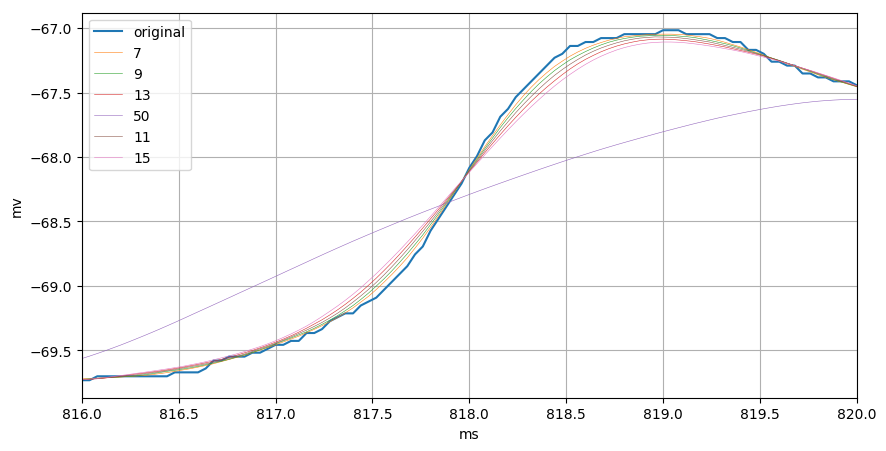

In [119]:
figura=figure(figsize=(10,5))
xlabel("ms")
ylabel("mv")
xlim(816,820)
#ylim(-70.25, -70)
ini=816
fin=820
rangt=tari(ini,fin)
plot(ini:0.04:fin,ejemplo[rangt], lw=1.5, label="original")
for nv in keys(r)
 plot(ini:0.04:fin,r[nv][rangt], label="$nv", lw=0.4)
end
legend()
grid()

In [120]:
figura=figure(figsize=(10,5))
xlabel("ms")
ylabel("mv")
xlim(813,900)
#ylim(-0.02, 0.020)
ini=813
fin=900
rangt=tari(ini,fin)
plot(ini:0.04:fin,eder[rangt], lw=2)
for nv in keys(d)
 plot(ini:0.04:fin,d[nv][rangt], label="$nv", lw=0.1*nv)
end
legend()
grid()

UndefVarError: UndefVarError: eder not defined

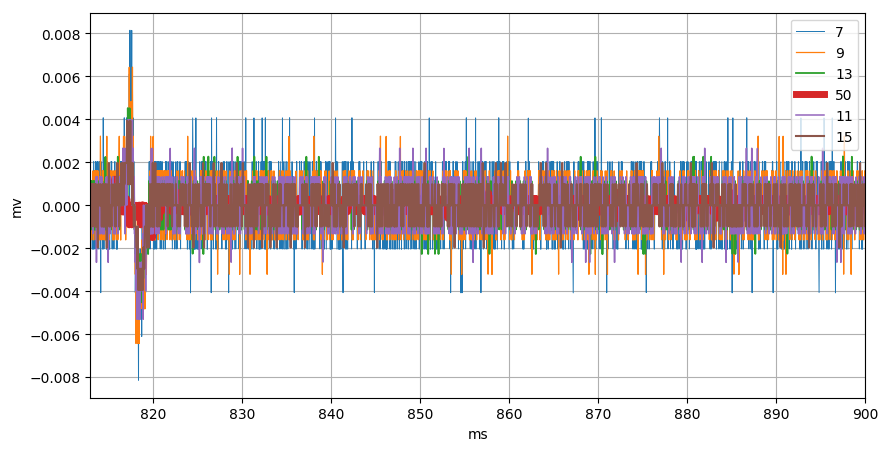

In [121]:
figura=figure(figsize=(10,5))
xlabel("ms")
ylabel("mv")
xlim(813,900)
#ylim(-0.02, 0.020)
ini=813
fin=900
rangt=tari(ini,fin)
#plot(ini:0.04:fin,eder[rangt], lw=2)
for nv in keys(d2)
 plot(ini:0.04:fin,d2[nv][rangt], label="$nv", lw=0.1*nv)
end
legend()
grid()

In [122]:
figura=figure(figsize=(10,5))

plot(eder)
plot(rder)



UndefVarError: UndefVarError: eder not defined

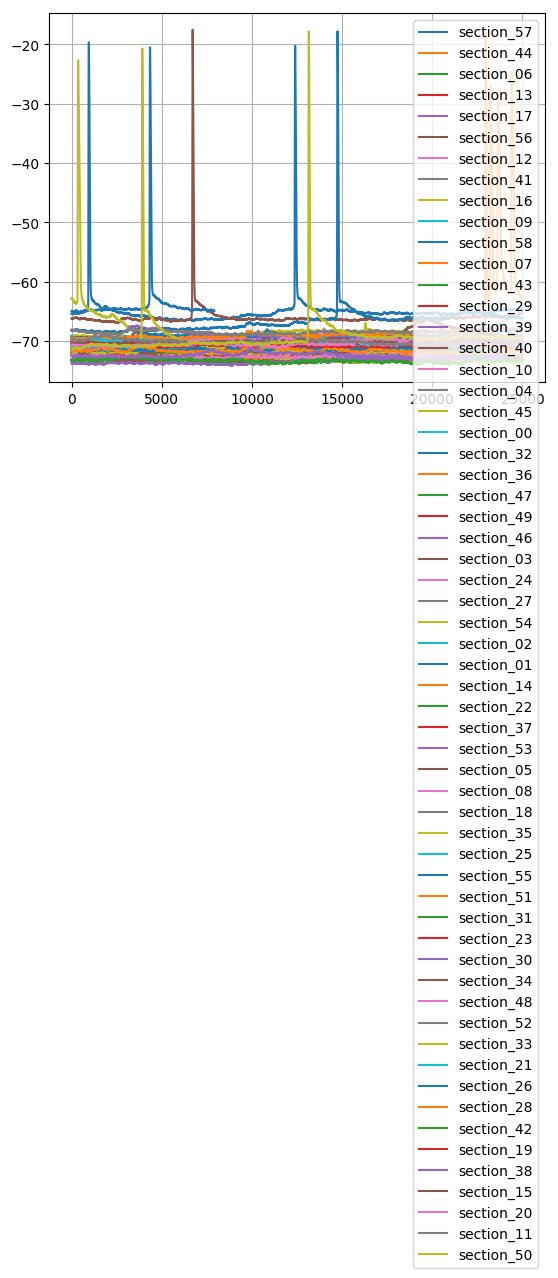

In [123]:
for (k,dats) in sweps
    plot(dats, label=k)
end
legend()
grid()

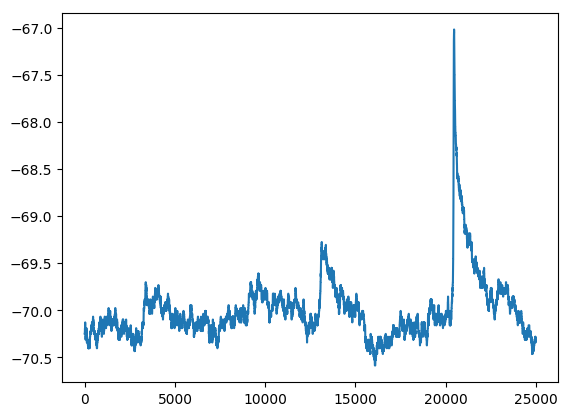

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02b369a080>

In [124]:
plot(ejemplo)

In [125]:
pico=findmax(ejemplo)

(-67.0166f0, 20475)

In [126]:
rangt

20325:22500

In [127]:
pico,lugarM=findmax(ejemplo)

(-67.0166f0, 20475)

In [128]:
valle,lugarVaux=findmin(ejemplo[lugarM-500:lugarM])
lugarV=lugarVaux+lugarM-500

20230

In [129]:
Subejemplo=ejemplo[lugarV:lugarM];

In [130]:
Vel=diff(Subejemplo);

In [131]:
PlotlyJS.plot(Subejemplo, marker_color="blue", line_width=1)

UndefVarError: UndefVarError: PlotlyJS not defined

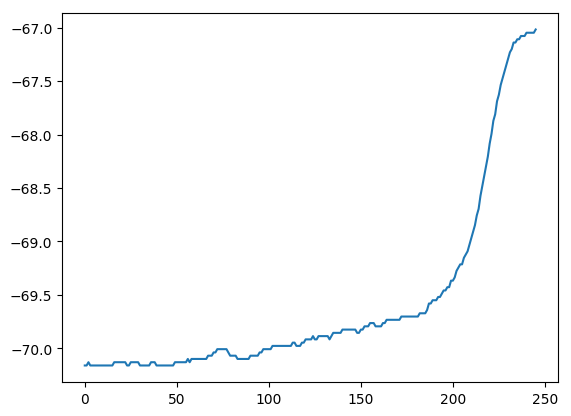

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02b5510d68>

In [132]:
plot(Subejemplo)

In [133]:
freq=1/0.04

25.0

In [134]:
tryed=(ejemplo,ejemplo/freq)

(Float32[-70.2515, -70.2515, -70.2515, -70.2515, -70.2209, -70.2209, -70.2209, -70.2209, -70.1904, -70.1904  …  -70.343, -70.343, -70.343, -70.343, -70.3125, -70.3125, -70.3125, -70.3125, -70.3125, -70.3125], [-2.81006, -2.81006, -2.81006, -2.81006, -2.80884, -2.80884, -2.80884, -2.80884, -2.80762, -2.80762  …  -2.81372, -2.81372, -2.81372, -2.81372, -2.8125, -2.8125, -2.8125, -2.8125, -2.8125, -2.8125])

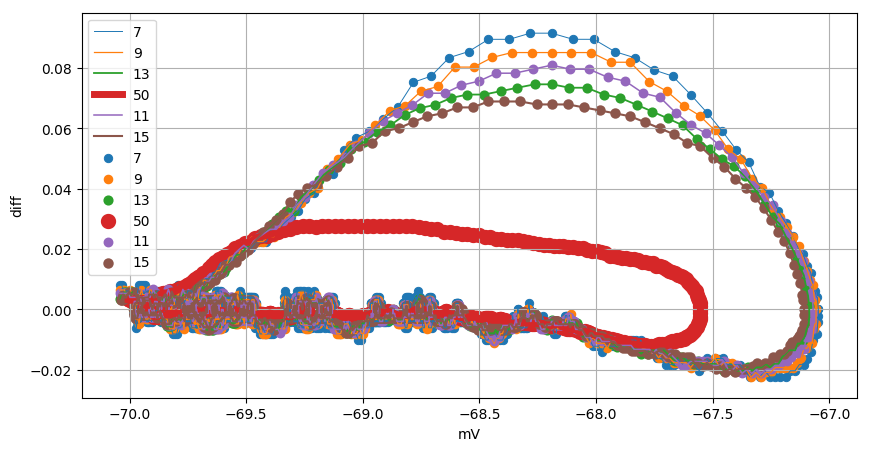

In [135]:
figura=figure(figsize=(10,5))
xlabel("mV")
ylabel("diff")
for nv in keys(d)
 plot(r[nv][rangt],d[nv][rangt], label="$nv", lw=0.1*nv)
 scatter(r[nv][rangt],d[nv][rangt], label="$nv", lw=0.1*nv)

end
legend()
grid()

In [136]:
gauss(x, sigma)=exp(-(x/sigma)^2/2)

gauss (generic function with 1 method)

In [137]:
function gaus1(desv::Real,n::Int)
    g=zeros(2*n+1)
    for j=-n:n
        g[j+n+1]=gauss(j,desv)
    end
    return g
end
        

gaus1 (generic function with 1 method)

In [138]:
p1=gaus1(2.4,7)

15-element Array{Float64,1}:
 0.014214791206736972
 0.04393693362340742 
 0.11416176000968689 
 0.24935220877729616 
 0.45783336177161427 
 0.7066482778577162  
 0.9168553557320289  
 1.0                 
 0.9168553557320289  
 0.7066482778577162  
 0.45783336177161427 
 0.24935220877729616 
 0.11416176000968689 
 0.04393693362340742 
 0.014214791206736972

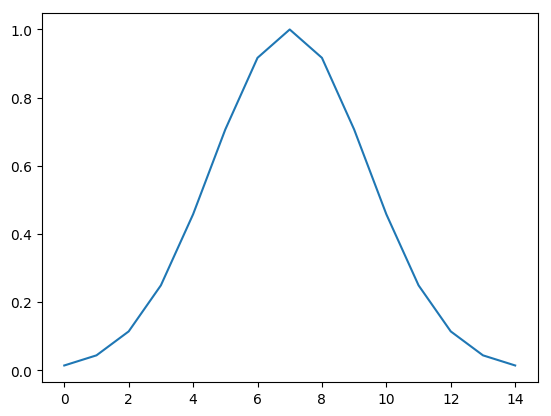

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02b37c3208>

In [139]:
plot(p1)

In [140]:
function smooth2(trazo::Array, nv=20)
    aux=trazo
    pesos=gaus1(nv/2,nv)
    pesoT=sum(pesos)
    l=length(trazo)
    cabeza=repeat([trazo[1]],nv)
    cola=repeat([trazo[end]],nv)
    aux=vcat(cabeza,aux,cola)
    result=zeros(l)
    for j=1:l
        for k=0:2*nv
        result[j]+=aux[j+k]*pesos[k+1]
        end
    end
    result/=pesoT
    return result 
end

smooth2 (generic function with 2 methods)

In [141]:
gs3=smooth2(ejemplo,10)

25000-element Array{Float64,1}:
 -70.242838359922  
 -70.23978240813292
 -70.23622338203435
 -70.23221789450294
 -70.22786046043939
 -70.22327755027943
 -70.21861698097057
 -70.21369243485653
 -70.20883543180213
 -70.2041280760207 
 -70.19962162688307
 -70.19533693364984
 -70.19127089244496
   ⋮               
 -70.31693881340445
 -70.31848641408217
 -70.31976139756134
 -70.32065412341538
 -70.32110197746358
 -70.3210963570996 
 -70.3209046256937 
 -70.32030298635931
 -70.31920144314903
 -70.31804033743806
 -70.31690913885468
 -70.31587760172408

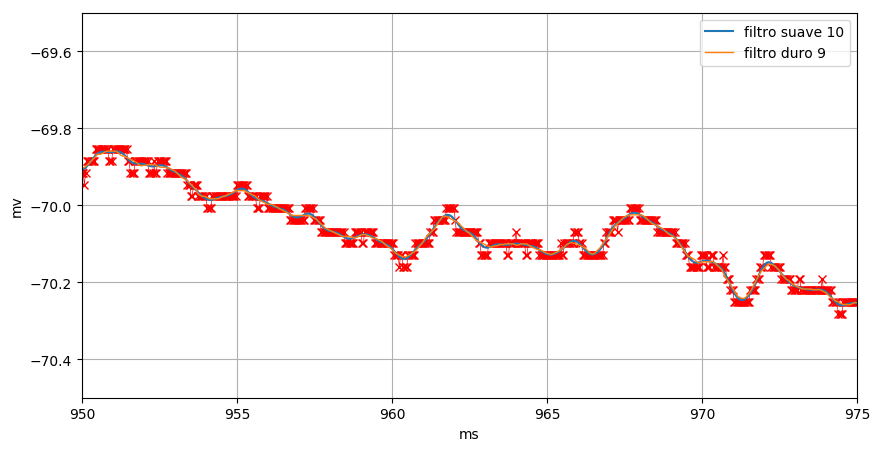

In [142]:
figura=figure(figsize=(10,5))
xlabel("ms")
ylabel("mv")
ini=1
fin=999
rangt=tari(ini,fin)
xlim(950,975)
ylim(-70.5,-69.5)
plot(ini:0.04:fin,ejemplo[rangt], lw=0.5, c="red", marker="x")
plot(ini:0.04:fin,gs3[rangt], label="filtro suave 10")
 plot(ini:0.04:fin,r[9][rangt], label="filtro duro 9", lw=1)
legend()
grid()


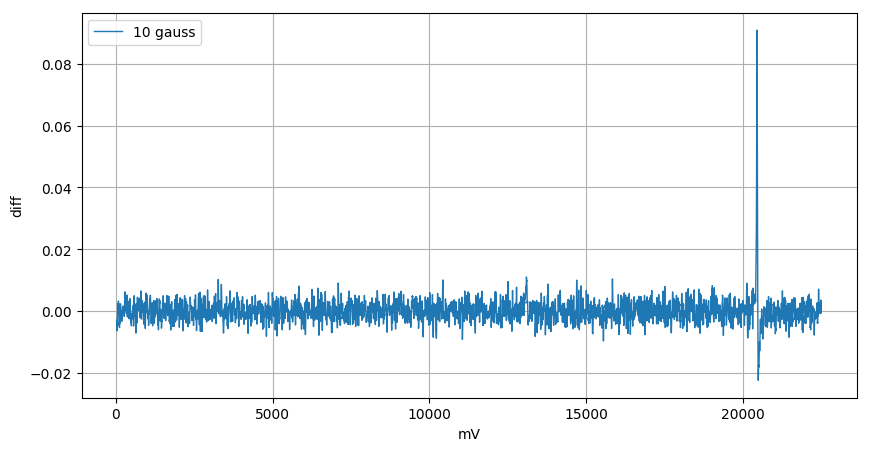

In [143]:
diffS=diff(gs3)
figura=figure(figsize=(10,5))
xlabel("mV")
ylabel("diff")
ini=1
fin=900
rangt=tari(ini,fin)

#for nv in keys(d)
 plot(rangt,diffS[rangt], label="10 gauss", lw=1)
#end
legend()
grid()

In [144]:


function intervalosP(dtrazo::Array,thres=0.06)
    #se recomienda usar una diferencia suavizada en dtrazo
    esunbrinco(x)=x>thres
    escontiguo(x,y)=(y-x)==1
    result=Dict{Int, Array}()
    r=findall(esunbrinco,dtrazo)
    k=1
    result[1]=[]
    for j=1:length(r)-1   
        if escontiguo(r[j], r[j+1])
            push!(result[k], r[j+1])
        else
            k+=1
            result[k]=[]
        end
    end           
    return result
end

intervalosP (generic function with 2 methods)

In [145]:
suspect=intervalosP(diffS,0.07)

Dict{Int64,Array} with 1 entry:
  1 => Any[20443, 20444, 20445, 20446, 20447, 20448, 20449, 20450, 20451, 20452…

In [146]:
for (llave, datos) in suspect
    p=findmax(datos)
    print(p)
end

(20455, 13)

In [147]:
?range

search: range LinRange UnitRange StepRange StepRangeLen trailing_zeros



```
range(start; length, stop, step=1)
```

Given a starting value, construct a range either by length or from `start` to `stop`, optionally with a given step (defaults to 1, a [`UnitRange`](@ref)). One of `length` or `stop` is required.  If `length`, `stop`, and `step` are all specified, they must agree.

If `length` and `stop` are provided and `step` is not, the step size will be computed automatically such that there are `length` linearly spaced elements in the range (a [`LinRange`](@ref)).

If `step` and `stop` are provided and `length` is not, the overall range length will be computed automatically such that the elements are `step` spaced (a [`StepRange`](@ref)).

# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96
```

---

```
range(start::Color; stop::Color, length=100)
```

Generates `n`>2 colors in a linearly interpolated ramp from `start` to`stop`, inclusive, returning an `Array` of colors.
